<a href="https://colab.research.google.com/github/epadam/machine-learning-practice/blob/master/practice/fashion_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install --user keras-importance-sampling
import keras

In [27]:
!pip install -q -U tensorflow>=1.8.0
!pip install blinker
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from importance_sampling.training import ImportanceTraining

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

ModuleNotFoundError: ignored

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


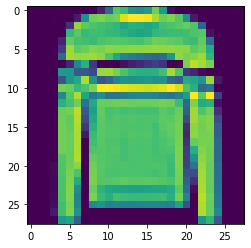

In [12]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [15]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [16]:

model = tf.keras.Sequential()


# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation("softmax"))

# Take a look at the model summary
model.summary()
'''
model_large = tf.keras.models.Sequential()
model_large.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model_large.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model_large.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_large.add(tf.keras.layers.Dropout(0.25))

model_large.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model_large.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model_large.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_large.add(tf.keras.layers.Dropout(0.25))

model_large.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model_large.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model_large.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_large.add(tf.keras.layers.Dropout(0.25))

model_large.add(tf.keras.layers.Flatten())
model_large.add(tf.keras.layers.Dense(256))
model_large.add(tf.keras.layers.Activation('elu'))
model_large.add(tf.keras.layers.Dropout(0.5))
model_large.add(tf.keras.layers.Dense(10))
model_large.add(tf.keras.layers.Activation('softmax'))
model_large.summary()
'''

ModuleNotFoundError: ignored

## 編譯模型

模型在定義好後需要編譯，編譯在這的意思是將參數的值做初始化。在編譯前必須設定好以下三個參數:

*   An optimizer - SGD或ADAM等梯度下降法
*   A loss function  - 損失函數，為資料與產生之預測的距離加總
*   A list of metrics  - 使用何種指標


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_large.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 訓練模型

編譯好後就可以將資料對這模型配適，使用fit().

我們預計進行10個回合的訓練，並將每回合的半成品模型收編建檔。
[ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) 模型只會在有最佳的validation準確度上進行update.


In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
checkpointer_large = ModelCheckpoint(filepath='model_large.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])


model_large.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_large])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.6046 - acc: 0.7769
Epoch 00001: val_loss improved from inf to 0.38444, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 11s 194us/step - loss: 0.6041 - acc: 0.7771 - val_loss: 0.3844 - val_acc: 0.8632
Epoch 2/10
54720/55000 [============================>.] - ETA: 0s - loss: 0.4165 - acc: 0.8488
Epoch 00002: val_loss improved from 0.38444 to 0.32371, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 9s 172us/step - loss: 0.4166 - acc: 0.8488 - val_loss: 0.3237 - val_acc: 0.8826
Epoch 3/10
54720/55000 [============================>.] - ETA: 0s - loss: 0.3731 - acc: 0.8645
Epoch 00003: val_loss improved from 0.32371 to 0.29404, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 9s 172us/step - loss: 0.3732 - acc: 0.8644 - val_loss: 0.2940 - val_acc: 0.8916


## 將最好的validation accuracy之模型取出

In [0]:
# Load the weights with the best validation accuracy
# model.load_weights('model.weights.best.hdf5')
model_large.load_weights('model_large.weights.best.hdf5')
model.load_weights('model.weights.best.hdf5')

## 用剩下的test資料集判斷test資料準確度

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
score_large  = model_large.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print('\n', 'Test accuracy of large model:', score_large[1])


 Test accuracy: 0.9098

 Test accuracy of large model: 0.9115


## 將預測結果視覺化
讓我們用剛剛訓練好的模型預測並視覺圖像化。
首先我們將預測值轉成類別標籤。接著我們印出前15張預測照片並附註預測結果於文字上。紅色代表預測失準，綠色則代表成功。


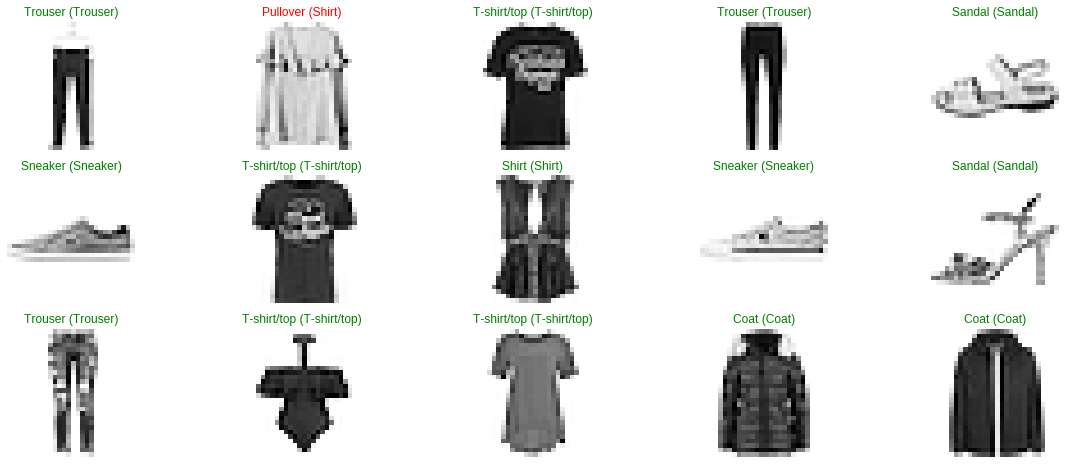

In [0]:
y_hat = model_large.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))